# Example of preprocessing of reference data

In [1]:
import geopandas as gpd

In [2]:
kk = gpd.GeoDataFrame.from_file('../data/ex1_cph_municipality/cykeldata_kk/cykeldata_kk.shp')

In [4]:
# Creating subset only with existing cycling infrastructure 
kk_selection = kk.loc[(kk.kategori == 'Cykelsti') & (kk.status =='Eksisterende')]

<AxesSubplot:>

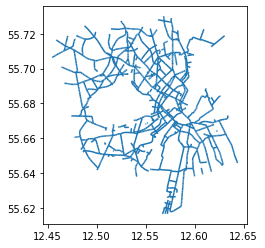

In [7]:
kk_selection.plot()

In [21]:
kk_selection.geom_type.unique()

array(['LineString', 'MultiLineString'], dtype=object)

In [53]:
# Convert MultiLineStrings to LineString
kk_linestrings = kk_selection.explode(ignore_index=True)
assert len(kk_linestrings.geom_type.unique()) == 1
assert kk_linestrings.geom_type.unique()[0] == 'LineString'
kk_linestrings.geom_type.unique()


array(['LineString'], dtype=object)

In [54]:
# Creating new unique id col
kk_linestrings.drop('id', axis=1, inplace=True)
kk_linestrings.reset_index(inplace=True)
kk_linestrings.rename(columns={'index':'feature_id'},inplace=True)
assert len(kk_linestrings) == len(kk_linestrings.feature_id.unique())

In [57]:
# Drop unnecessary columns
kk_linestrings.drop(['rute_nr','rutenavn','under_kate','kommune'], axis=1, inplace=True)

In [58]:
kk_linestrings

,feature_id,status,kategori,geometry
0,0,Eksisterende,Cykelsti,"LINESTRING (12.64037 55.65087, 12.64043 55.65074)"
1,1,Eksisterende,Cykelsti,"LINESTRING (12.52655 55.64829, 12.52723 55.64806)"
2,2,Eksisterende,Cykelsti,"LINESTRING (12.51616 55.66435, 12.51614 55.664..."
3,3,Eksisterende,Cykelsti,"LINESTRING (12.57217 55.67360, 12.57358 55.672..."
4,4,Eksisterende,Cykelsti,"LINESTRING (12.57308 55.67445, 12.57319 55.674..."
...,...,...,...,...
2234,2234,Eksisterende,Cykelsti,"LINESTRING (12.50217 55.69590, 12.50146 55.695..."
2235,2235,Eksisterende,Cykelsti,"LINESTRING (12.49240 55.69456, 12.49178 55.694..."
2236,2236,Eksisterende,Cykelsti,"LINESTRING (12.49351 55.69415, 12.49241 55.694..."
2237,2237,Eksisterende,Cykelsti,"LINESTRING (12.54376 55.67111, 12.54353 55.671..."


For this dataset we assume of all columns to be center line mappings and bidirectional, so we can add specify this in config file and do not have to add it to the data.

In [59]:
kk.to_file('../data/ex1_cph_municipality/cph_cycling_infra.gpkg',driver='GPKG')

/opt/miniconda3/envs/cdq/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
